## 🔹 **Day 1: Introduction to Python Libraries for Deep Learning**
# Step 1: Install essential packages
# Run these commands in your terminal or notebook
!pip install numpy pandas matplotlib tensorflow

In [4]:
# Step 1: Install essential packages
# Run these commands in your terminal or notebook
# !pip install numpy pandas matplotlib tensorflow

# Step 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Step 3: Verify Keras
print("Keras version:", keras.__version__)

Keras version: 3.12.0


### 🧠 Practice Exercise

Write a short Python script to:
1. Import NumPy and create an array `[1,2,3,4,5]`.
2. Multiply each value by 10 and print the result.

In [2]:
import numpy as np
arr = np.array([1,2,3,4,5])
print(arr * 10)

[10 20 30 40 50]


## 🔹 **Day 2: Understanding Neural Networks and Sequential Models**
- **Sequential Model:**  
    A simple, straight-line flow of layers — data moves from input → hidden layers → output.

In [10]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Step 1: Create data
X = np.array([0,1,2,3,4,5])
y = 2*X + 1

# Step 2: Define model
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

# Step 3: Compile model
model.compile(optimizer='adam', loss='mse')

# Step 4: Train model
model.fit(X, y, epochs=200, verbose=0)

# Step 5: Test model
print(model.predict(np.array([10])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[18.43118]]


### 🧠 Practice Exercise

Try predicting `y` for `x = [6,7,8]` using the trained model.

In [11]:
print(model.predict(np.array([6,7,8])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[11.132216]
 [12.956957]
 [14.781698]]


## 🔹 **Day 3: Introduction to LSTM Networks**

In [16]:
import numpy as np

# Step 1: Create simple sequence data
seq_length = 5
X = [[i+j for j in range(seq_length)] for i in range(100)]
y = [[i+(i-1)*0.5+(i-2)*0.2+(i-3)*0.1 for i in range(4,104)]]
X = np.array(X).reshape((100,5,1))  # LSTM expects 3D input
y = np.array(y).reshape((100,1))

print("X shape:", X.shape)  # (100, 5, 1)

X shape: (100, 5, 1)


### 🧠 Practice Exercise
Reshape `X` to prepare it for an MLP instead (no time steps).
### ✅ Solution & Explanation

In [13]:
X_simple = np.array([[i] for i in range(4,104)]).reshape((100,1))
print("MLP shape:", X_simple.shape)

MLP shape: (100, 1)


## 🔹 **Day 4: Building and Training an LSTM Model**

In [17]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Step 1: Define model
model = Sequential()
model.add(LSTM(8, input_shape=(5,1), return_sequences=False))
model.add(Dense(2, activation='linear'))
model.add(Dense(1, activation='linear'))

# Step 2: Compile
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Step 3: Train
model.fit(X, y, epochs=200, batch_size=5, validation_split=0.1, verbose=1)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0000e+00 - loss: 9389.9199 - val_accuracy: 0.0000e+00 - val_loss: 30591.0410
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 9349.8350 - val_accuracy: 0.0000e+00 - val_loss: 30511.1680
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 9280.8125 - val_accuracy: 0.0000e+00 - val_loss: 30283.7812
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 9175.8037 - val_accuracy: 0.0000e+00 - val_loss: 30098.7500
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 9070.8340 - val_accuracy: 0.0000e+00 - val_loss: 29842.3945
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 8988.0254 - val_accuracy: 0.0000e+00 - val_loss: 29701.2871
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 8929.0244 - val_accuracy: 0.0000e+00 - val_loss: 29579.2090
Epoch

LSTM Accuracy: 0.0
MLP Accuracy: 0.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


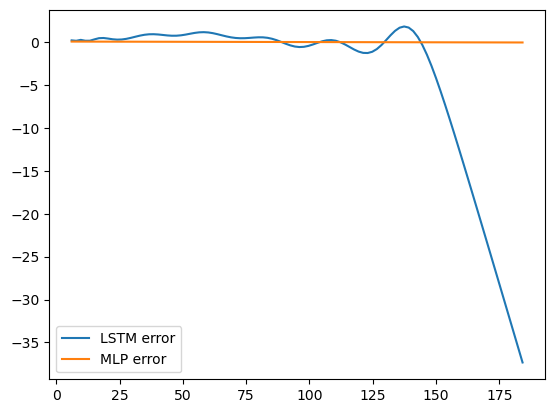

In [18]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# MLP Model
model_mlp = Sequential()
model_mlp.add(Dense(8, input_dim=1, activation='linear'))
model_mlp.add(Dense(2, activation='linear'))
model_mlp.add(Dense(1, activation='linear'))
model_mlp.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model_mlp.fit(X_simple, y, epochs=200, batch_size=5, verbose=0)

# Compare
lstm_scores = model.evaluate(X, y, verbose=0)
mlp_scores = model_mlp.evaluate(X_simple, y, verbose=0)

print("LSTM Accuracy:", lstm_scores[1])
print("MLP Accuracy:", mlp_scores[1])

# Visualize
y_pred_lstm = model.predict(X)
y_pred_mlp = model_mlp.predict(X_simple)

plt.plot(y, y_pred_lstm - y, label='LSTM error')
plt.plot(y, y_pred_mlp - y, label='MLP error')
plt.legend(); plt.show()